Importing the libraries 

In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import numpy as np
import openpyxl
import pymannkendall as mk

In [132]:
# importing data
df = pd.read_csv("data.csv")
df['Date']= pd.to_datetime(df['Date'])
df.head()

,Date,Year,Month,Season,Jaffna,Vauniya,Killinochi,Mullaitivu,Mannar
0,1989-01-01,1989,1,NEM,14.9,14.2,79.1,15.0,0.0
1,1989-02-01,1989,2,NEM,0.0,0.0,0.0,0.0,122.0
2,1989-03-01,1989,3,FIM,0.0,86.6,15.2,4.0,123.0
3,1989-04-01,1989,4,FIM,33.0,121.3,44.4,5.0,26.0
4,1989-05-01,1989,5,SWM,46.0,72.9,33.3,7.0,0.0


In [133]:
#Create a new variable called ‘total’: Total rainfall in all five districts

df['total']=df['Jaffna']+df['Vauniya']+df['Killinochi']+df['Mullaitivu']+df['Mannar']

In [135]:
#checking for any missing values 
df.isna().sum().sum()

0

Generating graphs for better interpretation

In [137]:
df_Jaffna=df.drop(['Vauniya','Killinochi','Mullaitivu','Mannar','total'], axis=1)
df_Vauniya=df.drop(['Jaffna','Killinochi','Mullaitivu','Mannar','total'], axis=1)
df_Killinochi=df.drop(['Vauniya','Jaffna','Mullaitivu','Mannar','total'], axis=1)
df_Mullaitivu=df.drop(['Vauniya','Killinochi','Jaffna','Mannar','total'], axis=1)
df_Mannar=df.drop(['Vauniya','Killinochi','Mullaitivu','Jaffna','total'], axis=1)
df_total=df.drop(['Vauniya','Killinochi','Mullaitivu','Jaffna','Mannar'], axis=1)

Text(0.5, 1.0, 'Average Rainfall in Jaffna')

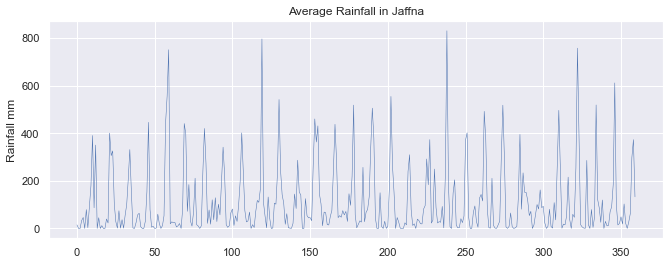

In [138]:

sns.set(rc={'figure.figsize': (11, 4)})
df['Jaffna'].plot(linewidth=0.5)
plt.ylabel("Rainfall mm")
plt.title('Average Rainfall in Jaffna')


Text(0.5, 0, 'Months')

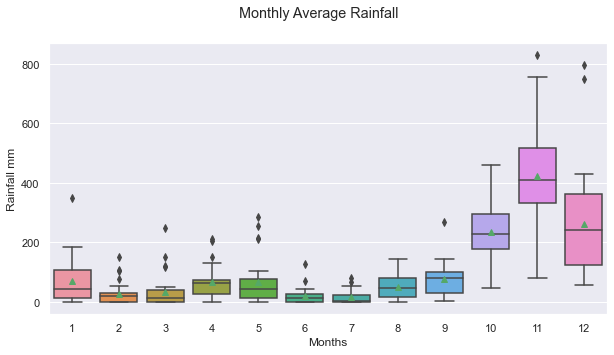

In [139]:
fig, axes = plt.subplots(1, 1, sharex=True, figsize=(10,5))
fig.suptitle('Monthly Average Rainfall')
sns.boxplot(data=df_Jaffna, x='Month', y='Jaffna',showmeans=True)
plt.ylabel("Rainfall mm")
plt.xlabel("Months")

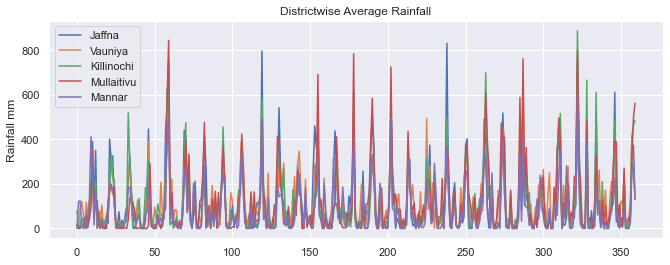

In [140]:
plt.plot(df_Jaffna['Jaffna'],label='Jaffna')
plt.plot(df_Vauniya['Vauniya'],label='Vauniya')
plt.plot(df_Killinochi['Killinochi'],label='Killinochi')
plt.plot(df_Mullaitivu['Mullaitivu'],label='Mullaitivu')
plt.plot(df_Mannar['Mannar'],label='Mannar')
plt.legend()
plt.ylabel("Rainfall mm")
plt.title('Districtwise Average Rainfall')
plt.show()

In [141]:
(df[['Jaffna','Vauniya','Killinochi','Mullaitivu','Mannar']].sum())/30

Jaffna        1347.059054
Vauniya       1400.624744
Killinochi    1356.568130
Mullaitivu    1407.461260
Mannar         975.085837
dtype: float64

In [142]:
print('Highest and lowest monthly average rainfall are jaffna in',df_Jaffna.groupby('Month')['Jaffna'].mean().idxmax(),'th month and',df_Jaffna.groupby('Month')['Jaffna'].mean().idxmin())
print('Highest and lowest monthly average rainfall are Vauniya in',df_Vauniya.groupby('Month')['Vauniya'].mean().idxmax(),'th month and',df_Vauniya.groupby('Month')['Vauniya'].mean().idxmin())
print('Highest and lowest monthly average rainfall are Killinochi in',df_Killinochi.groupby('Month')['Killinochi'].mean().idxmax(),'th month and',df_Killinochi.groupby('Month')['Killinochi'].mean().idxmin())
print('Highest and lowest monthly average rainfall are Mullaitivu in',df_Mullaitivu.groupby('Month')['Mullaitivu'].mean().idxmax(),'th month and',df_Mullaitivu.groupby('Month')['Mullaitivu'].mean().idxmin())
print('Highest and lowest monthly average rainfall are Mannar in',df_Mannar.groupby('Month')['Mannar'].mean().idxmax(),'th month and',df_Mannar.groupby('Month')['Mannar'].mean().idxmin())

Highest and lowest monthly average rainfall are jaffna in 11 th month and 7
Highest and lowest monthly average rainfall are Vauniya in 11 th month and 6
Highest and lowest monthly average rainfall are Killinochi in 11 th month and 6
Highest and lowest monthly average rainfall are Mullaitivu in 11 th month and 6
Highest and lowest monthly average rainfall are Mannar in 11 th month and 6


In [143]:
df_monthlyAvg = df.drop(['Year'], axis=1).groupby('Month').mean()
df_monthlyAvg.to_excel('monthly average districtwise.xlsx')
df_monthlyAvg.head


<bound method NDFrame.head of            Jaffna     Vauniya  Killinochi  Mullaitivu      Mannar        total
Month                                                                         
1       70.228307  117.174050   89.094162  111.435266   62.291443   450.223229
2       28.049645   73.657682   60.482527   72.108312   31.420224   265.718391
3       34.354797   48.735722   46.463239   29.661601   38.598472   197.813831
4       66.269529  123.953670   69.461445   48.191997   84.501766   392.378407
5       65.876535   93.505619   77.112452   82.646084   59.979807   379.120496
6       19.477168   19.998300   18.448646   15.025077    8.231097    81.180288
7       15.701412   34.459242   22.665868   36.904378   10.004542   119.735441
8       51.261026   62.284068   49.025369   59.945509   17.370805   239.886777
9       76.174346   88.812292   65.369483   74.430234   48.218477   353.004832
10     236.092883  228.593330  204.264203  202.479701  173.659968  1045.090085
11     422.450430  276

In [144]:
df_seasonalAvg = df.drop(['Year','Month'], axis=1).groupby('Season').mean()
df_seasonalAvg.to_excel('seasonal average districtwise.xlsx')
df_seasonalAvg


,Jaffna,Vauniya,Killinochi,Mullaitivu,Mannar,total
Season,,,,,,
FIM,50.312163,86.344696,57.962342,38.926799,61.550119,295.096119
NEM,119.800310,141.263475,143.088340,164.754459,89.051083,657.957667
SIM,329.271656,252.542703,289.378304,283.196502,220.513810,1374.902976
SWM,45.698097,59.811904,46.524364,53.790257,28.760946,234.585567


In [145]:
df_seasonSum = df.drop(['Year','Month'], axis=1).groupby('Season').sum()
df_seasonSum.to_excel('seasonal total rainfall districtwise.xlsx')
df_seasonSum


,Jaffna,Vauniya,Killinochi,Mullaitivu,Mannar,total
Season,,,,,,
FIM,3018.729756,5180.681758,3477.740516,2335.607954,3693.007154,17705.767139
NEM,10782.027903,12713.712754,12877.950606,14827.901271,8014.597490,59216.190024
SIM,19756.299388,15152.562193,17362.698238,16991.790106,13230.828621,82494.178547
SWM,6854.714586,8971.785629,6978.654527,8068.538477,4314.141832,35187.835051


In [146]:
df_yearlyAvg = df.drop(['Month'], axis=1).groupby('Year').mean()
df_yearlyAvg.to_excel('yearly monthly avarage districtwise.xlsx')
df_yearlyAvg.head()

,Jaffna,Vauniya,Killinochi,Mullaitivu,Mannar,total
Year,,,,,,
1989,77.408333,83.075000,83.200000,57.166667,95.034167,395.884166
1990,125.166667,109.566667,104.608333,75.250000,76.570792,491.162458
1991,91.333333,86.495195,117.308333,42.541667,60.187940,397.866467
1992,72.013792,97.191667,92.133333,41.808333,53.876726,357.023851
1993,159.108334,143.525000,159.208333,143.816667,107.642764,713.301097


In [147]:
df_seasonal = df.drop(['Date', 'Season', 'Month'], axis=1)
df_seasonal = df_seasonal.groupby(['Year']).sum()
df_seasonal.head()


,Jaffna,Vauniya,Killinochi,Mullaitivu,Mannar,total
Year,,,,,,
1989,928.899996,996.900000,998.4,686.0,1140.410000,4750.609996
1990,1502.000000,1314.800000,1255.3,903.0,918.849499,5893.949499
1991,1095.999997,1037.942334,1407.7,510.5,722.255278,4774.397609
1992,864.165499,1166.300000,1105.6,501.7,646.520715,4284.286214
1993,1909.300003,1722.300000,1910.5,1725.8,1291.713162,8559.613165


In [148]:
#perform Mann-Kendall Trend Test
mk.original_test(df_seasonal['Jaffna'])

Mann_Kendall_Test(trend='no trend', h=False, p=1.0, z=0.0, Tau=-0.0022988505747126436, s=-1.0, var_s=3141.6666666666665, slope=-0.2062495463124776, intercept=1350.685357416531)

In [149]:
mk.original_test(df_seasonal['Vauniya'])

Mann_Kendall_Test(trend='increasing', h=True, p=0.011295345713621785, z=2.533426402497224, Tau=0.32873563218390806, s=143.0, var_s=3141.6666666666665, slope=11.968421052631578, intercept=1195.757894736842)

In [150]:
mk.original_test(df_seasonal['Killinochi'])

Mann_Kendall_Test(trend='increasing', h=True, p=0.026946782463489027, z=2.212287844434196, Tau=0.28735632183908044, s=125.0, var_s=3141.6666666666665, slope=11.649999999999977, intercept=1075.7250000000004)

In [151]:
mk.original_test(df_seasonal['Mullaitivu'])

Mann_Kendall_Test(trend='increasing', h=True, p=0.0006137187417227796, z=3.425477952672303, Tau=0.4436781609195402, s=193.0, var_s=3141.6666666666665, slope=34.027272727272745, intercept=960.454545454545)

In [152]:
mk.original_test(df_seasonal['Mannar'])

Mann_Kendall_Test(trend='no trend', h=False, p=0.5441196833389506, z=0.6065950541190537, Tau=0.08045977011494253, s=35.0, var_s=3141.6666666666665, slope=2.3944446738888954, intercept=895.880552228611)

In [153]:
mk.original_test(df_seasonal['total'])

Mann_Kendall_Test(trend='increasing', h=True, p=0.0053825476031263975, z=2.783200836546246, Tau=0.36091954022988504, s=157.0, var_s=3141.6666666666665, slope=67.60000092833333, intercept=5346.690707430666)

In [154]:
#Calculating coefficient of variance
cv = lambda x: np.std(x, ddof=1) / np.mean(x) * 100 
df_seasonal.apply(cv)

Jaffna        23.362103
Vauniya       18.541495
Killinochi    23.685456
Mullaitivu    32.664138
Mannar        21.498950
total         18.660393
dtype: float64